# Import all commonly used libraries

In [4]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(42)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# PROJECT_ROOT_DIR = "C:\Users\venkatsw\Dropbox\Code\Python Projects\Hands on Training\"
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images",CHAPTER_ID, fig_id + ".png")
    print ("Saving Figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png',dpi=300)
        


In [5]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

# Fetch Data

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)
mnist['data'], mnist['target'] # unsorted dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
mnist['data'], mnist['target'] #sorted dataset

In [6]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [7]:
X,y = mnist['data'], mnist['target'] # Assign X and y vectors

In [8]:
print('Shape of X is ',X.shape)
print('Shape of y is ',y.shape)

Shape of X is  (70000, 784)
Shape of y is  (70000,)


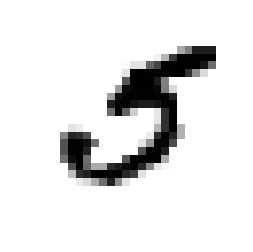

In [9]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = 'nearest')
plt.axis('off')
#save_fig("Some_digit_plot")
plt.show()

## All Images Plot

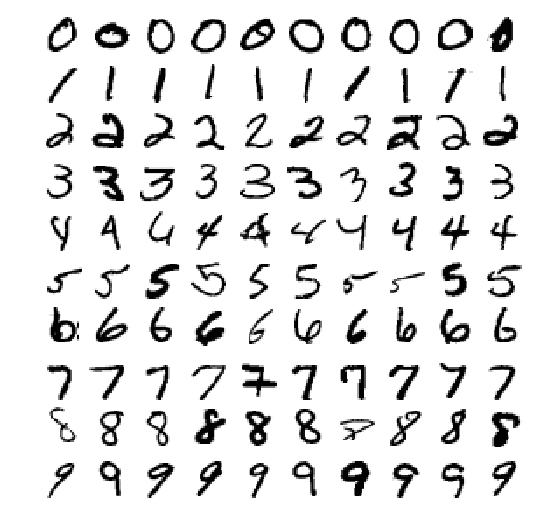

In [10]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
#save_fig("more_digits_plot")
plt.show()

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index],y_train[shuffle_index]

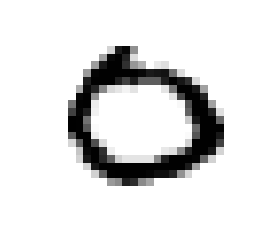

The currect number is 0


In [13]:
some_digit_shuff = X_train[50000]
some_digit_image = some_digit_shuff.reshape(28,28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = 'nearest')
plt.axis('off')
#save_fig("Some_digit_plot_after shuffle")
plt.show()
print ('The currect number is', y_train[50000])

In [14]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test==5)

In [15]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter= 5, tol=-np.infty, random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
sgd_clf.predict([some_digit])

array([ True])

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5,cv=3, scoring='accuracy')

array([0.9502 , 0.96565, 0.96495])

## Stratified Data Split and Folds

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state = 42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) # Clone does a deep copy of the model in an estimator without actually copying attached data
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

0.9502
0.96565
0.96495


In [19]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [20]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90715, 0.9128 ])

# Confusion Matrix

In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred= cross_val_predict(sgd_clf,X_train, y_train_5, cv=3)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]], dtype=int64)

In [23]:
y_perfect_pred = y_train_5
confusion_matrix(y_train_5, y_perfect_pred)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [24]:
from sklearn.metrics import precision_score, recall_score
prec_score = precision_score(y_train_5, y_train_pred)
prec_score

0.7687135020350381

In [25]:
rec_score = recall_score(y_train_5, y_train_pred)
rec_score

0.801328168234643

In [26]:
F1_score = (2*prec_score*rec_score)/(prec_score+rec_score)
F1_score

0.7846820809248555

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7846820809248555

In [28]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([161855.74572176])

In [29]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [30]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

array([ -434076.49813641, -1825667.15281624,  -767086.76186905, ...,
        -867191.25267994,  -565357.11420164,  -366599.16018198])

In [32]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

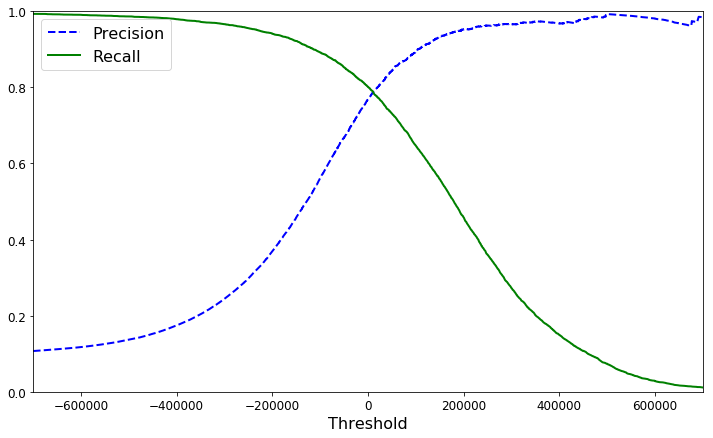

In [33]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(12, 7))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])

plt.show()

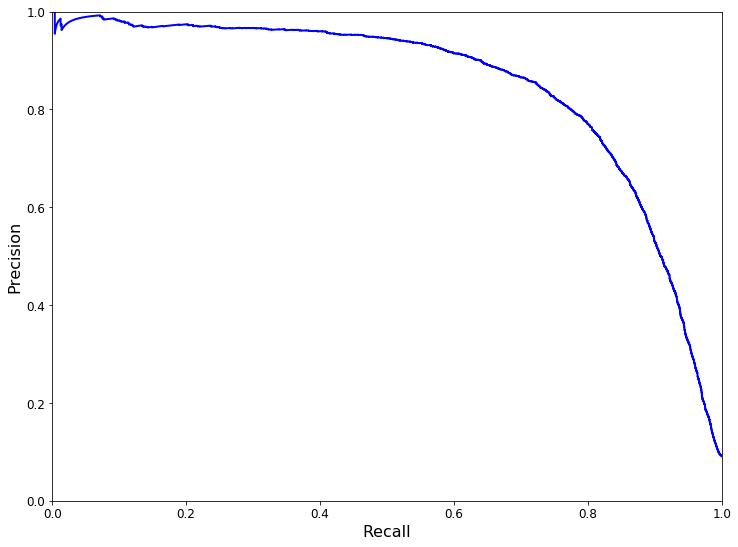

In [34]:
def plot_precision_vs_recall (precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
plt.figure(figsize =(12,9))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [35]:
threshold = 70000
y_pred_90 = (y_scores > threshold)
y_pred_90

array([False, False, False, ..., False, False, False])

In [36]:
prec_score = precision_score(y_train_5, y_pred_90)
rec_score = recall_score(y_train_5, y_pred_90)
print('For a thresold of',threshold,',the precision is ', prec_score*100, 'and recall score is', rec_score*100)

For a thresold of 70000 ,the precision is  86.59205116491549 and recall score is 69.93174691016418


## Receiver Operating Characteristics (ROC)

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

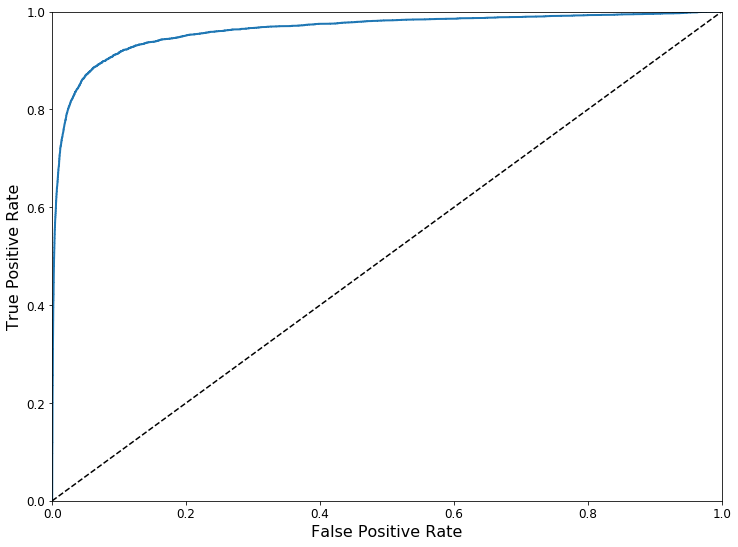

In [38]:
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr, tpr,linewidth=2, label = label)
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.plot([0,1],[0,1], 'k--')
plt.figure(figsize =(12,9))
plot_roc_curve(fpr, tpr)
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9624496555967156

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier (n_estimators = 10,random_state =42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [41]:
y_scores_forest = y_probas_forest[:,1]

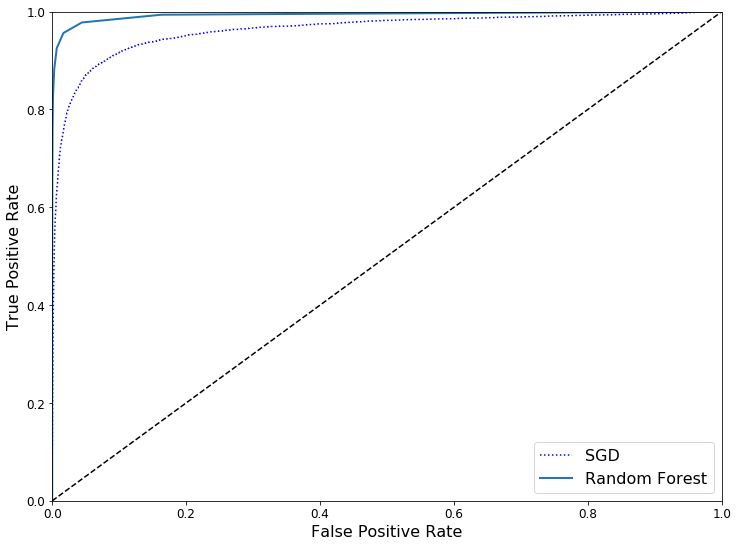

In [42]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.figure(figsize =(12,9))
plt.plot(fpr,tpr,"b:", label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right', fontsize=16)
plt.show()

In [43]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

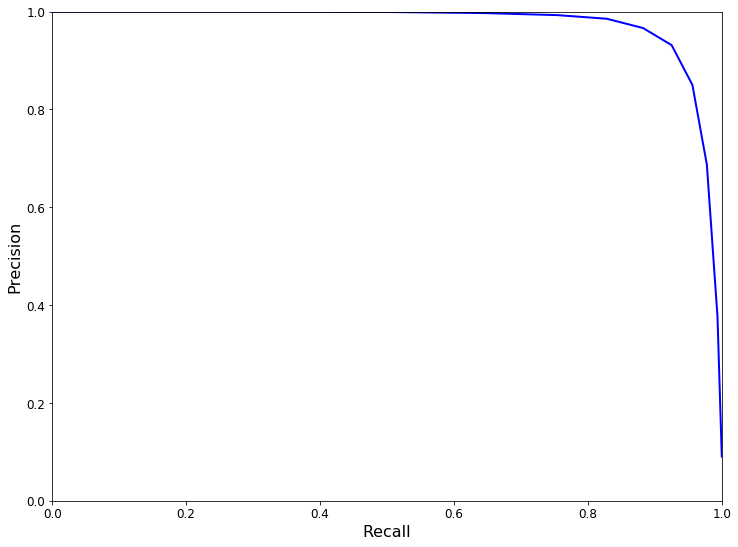

In [44]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)
plt.figure(figsize =(12,9))
plot_precision_vs_recall(precisions_forest, recalls_forest)
plt.show()

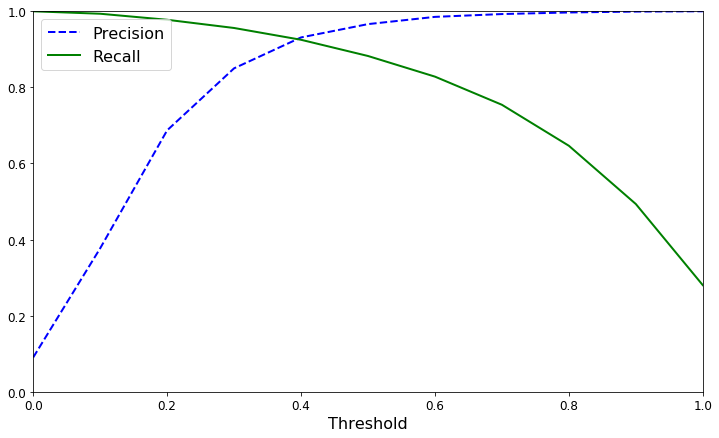

In [45]:
plt.figure(figsize=(12, 7))
plot_precision_recall_vs_threshold(precisions_forest, recalls_forest, thresholds_forest)
plt.xlim([-0, 1])
plt.show()

In [46]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3) # Does not give a binary as we did not specify method (predict_proba)
prec_score_forest = precision_score(y_train_5, y_train_pred_forest)
rec_score_forest = recall_score(y_train_5, y_train_pred_forest)
print('For the random forest classifier, the precision is', prec_score_forest*100,'% and the recall score is', rec_score_forest*100, '%')

For the random forest classifier, the precision is 98.52973447443493 % and the recall score is 82.82604685482383 %


# Multi-Class Classification

## One vs All Stochastic Gradient Descent 

In [47]:
sgd_clf.fit(X_train,y_train) # Uses Ove vs All method
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [48]:
some_digit_scores = sgd_clf.decision_function ([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [49]:
np.argmax(some_digit_scores)

5

In [50]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [51]:
sgd_clf.classes_[5]

5

## One vs One Stochastic Gradient Descent 

In [52]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter = 5, tol=-np.infty, random_state=42)) # tol is tolerance for stopping
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [53]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [54]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [55]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.84063187, 0.84899245, 0.86652998])

In [56]:
cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.90796841, 0.91494575, 0.91383708])

In [57]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.94041192, 0.93879694, 0.93949092])

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.91011798, 0.90874544, 0.906636  ])

In [59]:
cross_val_score(ovo_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.91476705, 0.91369568, 0.92108816])

In [60]:
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.94056189, 0.93909695, 0.93914087])

In [61]:
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx_sgd = confusion_matrix(y_train, y_train_pred_sgd)
conf_mx_sgd

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]],
      dtype=int64)

In [62]:
y_train_pred = cross_val_predict(ovo_clf, X_train_scaled, y_train, cv=3)
conf_mx_ovo = confusion_matrix(y_train, y_train_pred)
conf_mx_ovo

array([[5679,    1,   21,   18,   13,   84,   43,    6,   51,    7],
       [   0, 6426,   72,   36,    8,   38,    4,   42,  104,   12],
       [  27,   43, 5387,  132,   67,   32,   54,   62,  142,   12],
       [  15,   13,  110, 5502,    5,  246,    7,   48,  148,   37],
       [   6,   21,   55,   12, 5320,   15,   31,   41,   43,  298],
       [  28,   15,   39,  181,   34, 4841,   51,   12,  181,   39],
       [  36,    8,   90,    6,   41,  124, 5569,    3,   40,    1],
       [  10,   13,   62,   57,   39,   15,    1, 5735,   21,  312],
       [  26,   72,   71,  185,   15,  190,   29,   19, 5181,   63],
       [  13,   15,   26,   65,  123,   54,    2,  237,   63, 5351]],
      dtype=int64)

In [63]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
conf_mx_forest = confusion_matrix(y_train, y_train_pred_forest)
conf_mx_forest

array([[5805,    1,   11,    9,    8,   13,   32,    3,   38,    3],
       [   1, 6616,   39,   23,   13,    6,    9,   19,   10,    6],
       [  49,   30, 5638,   49,   47,   16,   28,   41,   53,    7],
       [  20,   17,  135, 5646,   16,  123,    7,   45,   90,   32],
       [  18,   17,   33,   11, 5526,    4,   35,   19,   26,  153],
       [  52,   21,   27,  201,   40, 4939,   43,    6,   62,   30],
       [  56,   17,   21,    9,   27,   68, 5692,    0,   24,    4],
       [  12,   39,   97,   26,   69,    9,    1, 5911,   15,   86],
       [  29,   60,   98,  153,   57,  100,   33,   15, 5229,   77],
       [  34,   18,   23,   98,  164,   45,   10,  115,   68, 5374]],
      dtype=int64)

In [64]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

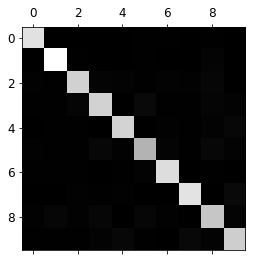

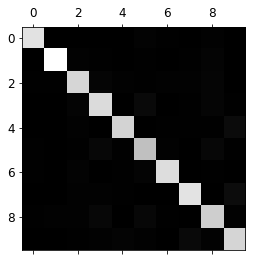

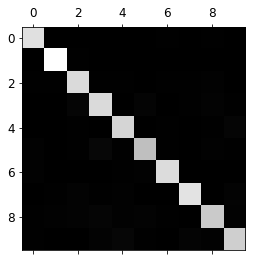

In [65]:
plt.matshow(conf_mx_sgd, cmap = plt.cm.gray)
plt.matshow(conf_mx_ovo, cmap = plt.cm.gray)
plt.matshow(conf_mx_forest, cmap = plt.cm.gray)
plt.show()

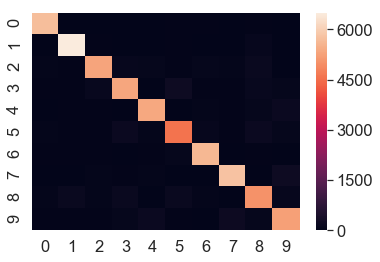

In [66]:
import seaborn as sn
      
cm_sgd = pd.DataFrame(conf_mx_sgd, range(10),
                  range(10))
sn.set(font_scale=1.5)#for label size
sn.heatmap(cm_sgd, annot=False,annot_kws={"size": 12})

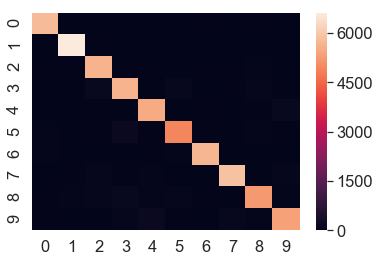

In [67]:
cm_forest = pd.DataFrame(conf_mx_forest, range(10),
                  range(10))
sn.set(font_scale=1.5)#for label size
sn.heatmap(cm_forest, annot=False,annot_kws={"size": 12})

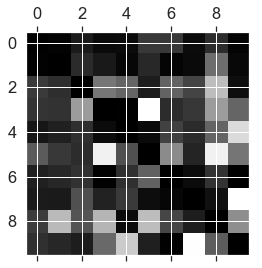

In [68]:
row_sums_sgd = conf_mx_sgd.sum(axis=1, keepdims=True)
norm_conf_mx_sgd = conf_mx_sgd/row_sums_sgd
np.fill_diagonal(norm_conf_mx_sgd,0)
plt.matshow(norm_conf_mx_sgd, cmap = plt.cm.gray)
plt.show()

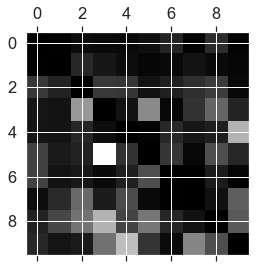

In [69]:
row_sums_forest = conf_mx_forest.sum(axis=1, keepdims=True)
norm_conf_mx_forest = conf_mx_forest/row_sums_forest
np.fill_diagonal(norm_conf_mx_forest,0)
plt.matshow(norm_conf_mx_forest, cmap = plt.cm.gray)
plt.show()

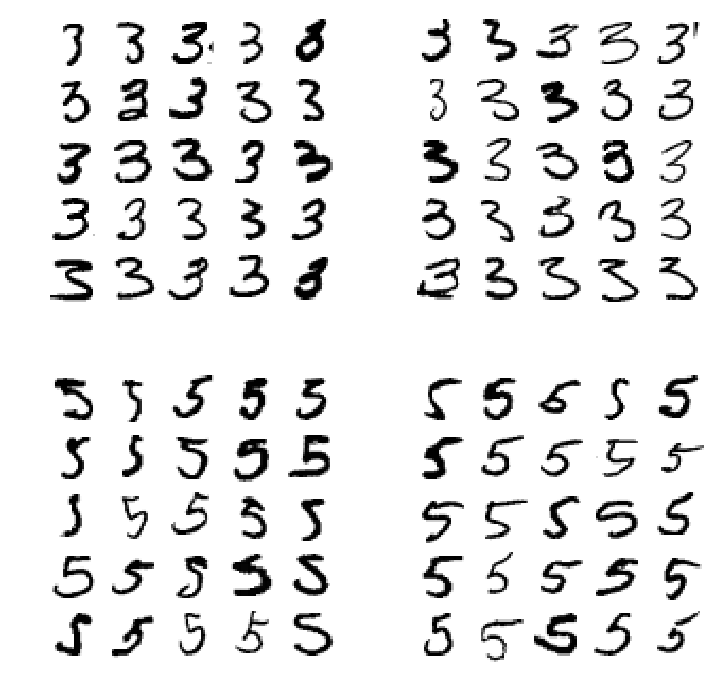

In [70]:
cl_a, cl_b = 3,5
X_aa = X_train[(y_train==cl_a) & (y_train_pred_sgd == cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred_sgd == cl_b)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred_sgd == cl_b)]
X_ba = X_train[(y_train==cl_b) & (y_train_pred_sgd == cl_a)]
plt.figure(figsize =(12,12))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row =5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row =5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row =5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row =5)
plt.show()

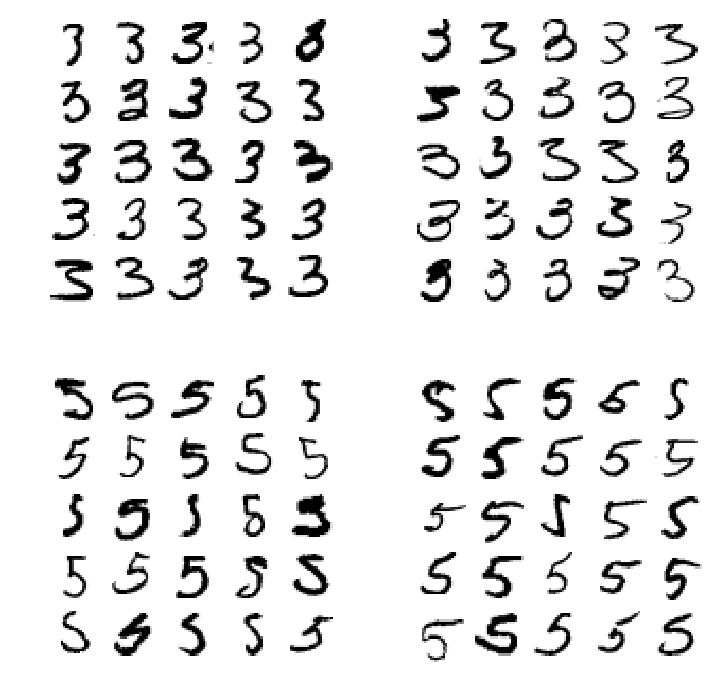

In [71]:
cl_a, cl_b = 3,5
X_aa = X_train[(y_train==cl_a) & (y_train_pred_forest == cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred_forest == cl_b)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred_forest == cl_b)]
X_ba = X_train[(y_train==cl_b) & (y_train_pred_forest == cl_a)]
plt.figure(figsize =(12,12))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row =5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row =5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row =5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row =5)
plt.show()

## Multilabel Classification

In [72]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train>=7)
y_train_odd = (y_train%2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd] # combines both arrasys
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [73]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed: 100.1min remaining: 400.3min
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed: 100.2min remaining: 82.0min
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed: 171.0min remaining: 19.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 171.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

## Multi-Output Classification

In [75]:
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_with_noise = noise + X_train
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_with_noise = X_test + noise
y_train_clean = X_train
y_test_clean = X_test


In [76]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation = 'nearest')
    plt.axis("off")
    plt.figure(figsize=(12,12))

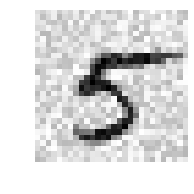

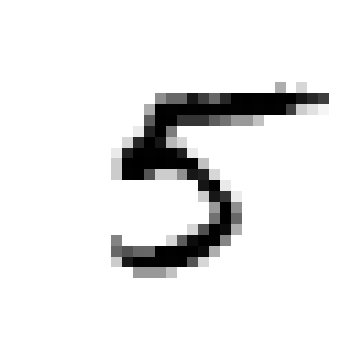

<Figure size 864x864 with 0 Axes>

In [77]:
some_index=5500
plt.subplot(121); plot_digit(X_test_with_noise[some_index])
plt.subplot(122); plot_digit(y_test_clean[some_index])
plt.show()

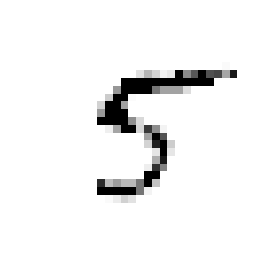

<Figure size 864x864 with 0 Axes>

In [78]:
knn_clf.fit(X_train_with_noise, y_train_clean)
clean_digit = knn_clf.predict([X_test_with_noise[some_index]])
plot_digit(clean_digit)

In [79]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx,dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dx,dy], cval=0, mode ='constant')
    return shifted_image.reshape([-1])

In [80]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5,0)

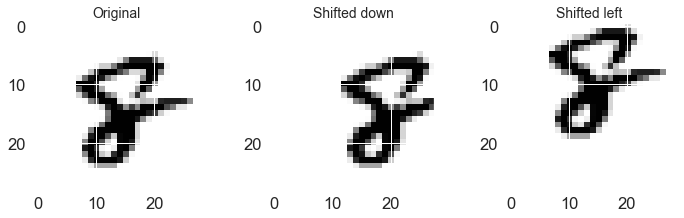

In [81]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [82]:
X_train_shifted = [image for image in X_train]
y_train_shifted = [label for label in y_train]
for dx, dy in ((1,0),(-1,0),(0,1),(0,-1)):
    for image, label in zip(X_train, y_train):
        X_train_shifted.append(shift_image(image,dx,dy))
        y_train_shifted.append(label)
X_train_shifted = np.array(X_train_shifted)
y_train_shifted = np.array(y_train_shifted)

In [83]:
shuffle_index = np.random.permutation(len(X_train_shifted))
X_train_shifted = X_train_shifted[shuffle_index]
y_train_shifted = y_train_shifted[shuffle_index]

In [84]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [85]:
knn_clf.fit(X_train_shifted, y_train_shifted)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance')

In [88]:
y_pred = knn_clf.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9763

## Summary
 - We tested several classification models (KNN, RF and SGDC) and found KNN model to have the highest accuracy
 - Further we used gridsearch for optimizing hyperparameters of KNN to improve the CV and test accuracy
 - Finally we improved accuracy by Image augmentation
 - Overall Accuracy > 97%